In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import os
import re
import scipy

import matplotlib 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
font2 = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 28}
matplotlib.rc('font', **font)
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
matplotlib.rcParams['mathtext.fontset'] = 'cm'
from collections import OrderedDict
import matplotlib.ticker as ticker
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
import ROOT

Welcome to JupyROOT 6.26/02


In [3]:
from pyunfold import iterative_unfold
from pyunfold.callbacks import Logger

In [4]:
import seaborn as sns

%matplotlib inline

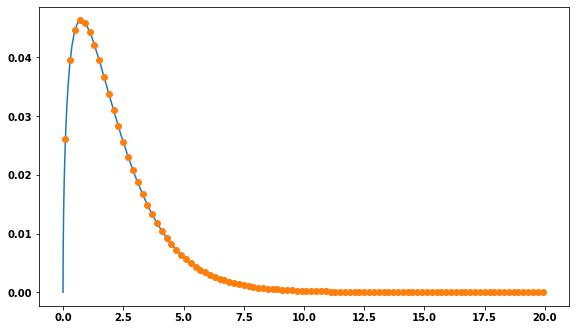

Info in <TH1F::SaveAs>: ROOT file LXe/hcf252.root has been created


In [5]:
fig,axis = plt.subplots()
fig.set_size_inches(9.5,5.5)
fig.subplots_adjust(hspace=0,wspace=0)

dat = np.genfromtxt("LXe/cf252_hires.txt",dtype='str').transpose()
xx = [float(i) for i in dat[1]]
yy = [float(i) for i in dat[2]]
axis.plot(xx,yy)

x = np.arange(0.1,20,0.2)
y = np.interp(x,xx,yy)
axis.plot(x,y,"o")

hcf252 = ROOT.TH1F("hcf252","hcf252",52,0,52*200+100)

cf252lowres = '/gps/hist/point 0 0\n'
for idx,i in enumerate(x):
    cf252lowres+="/gps/hist/point %g %g\n" % (i,y[idx])
    hcf252.SetBinContent(idx+1,y[idx])
with open('LXe/cf252_lowres.txt', 'w') as f:
    f.write(cf252lowres)

hcf252.SaveAs("LXe/hcf252.root")

### TOF

$$
E_{TOF}=\frac{1}{2}mv^{2}= \frac{1}{2}(939.6MeV/c^{2})\left (\frac{L}{TOF} \right) ^{2}
$$

In [6]:
import scipy.constants as phys_const
print(phys_const.speed_of_light*1e3/1e9,phys_const.physical_constants["neutron mass energy equivalent in MeV"][0])

def calE(tof,l=1086):
    #speed of light (mm/ns)
    c = phys_const.speed_of_light*1e3/1e9
    cc = 0.5*phys_const.physical_constants["neutron mass energy equivalent in MeV"][0]/c/c
    EMeV = cc*(l/tof)*(l/tof)
    return EMeV,cc

def calT(EMeV,l=1086):
    c = phys_const.speed_of_light*1e3/1e9
    cc = 0.5*phys_const.physical_constants["neutron mass energy equivalent in MeV"][0]/c/c
    tof = l/np.sqrt(EMeV/cc)
    return tof,cc


299.792458 939.5654133


In [7]:
print(calE(78))

(1.0132720540744198, 0.00522703754887143)


In [8]:
print(calT(1))

(78.51590397485576, 0.00522703754887143)


In [9]:
f1 = ROOT.TFile.Open("build-LXe/response_matrix_230101.root")
h1 = f1.Get("hmatrix")

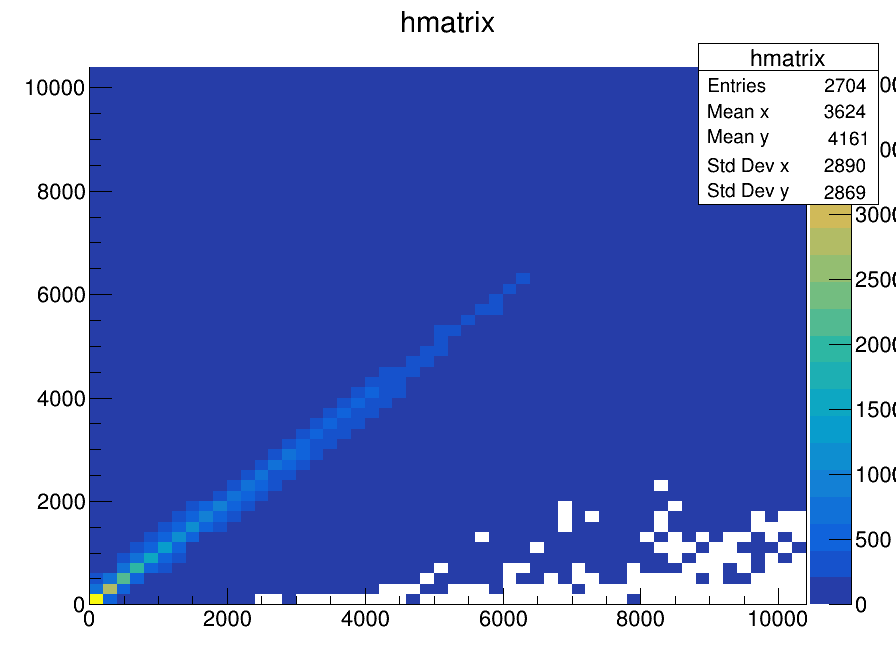

In [10]:
c1 = ROOT.TCanvas("c1","c1",900,700)
c1.cd()
h1.Draw("colz")
c1.Draw()

In [11]:
x = np.random.normal(2, 1, 100)
y = np.random.normal(1, 1, 100)
xedges = [0, 1, 3, 5]
yedges = [0, 2, 3, 4, 6]
# response_hist, _, _ = np.histogram2d([2, 4, 2, 4, 2, 4], [2, 4, 2, 4, 2, 4], bins=2,range=((0,6),(0,6)))
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))

print(H)

[[10.  1.  0.  0.]
 [42. 11.  1.  0.]
 [ 7.  3.  0.  0.]]


In [12]:
response_hist = np.zeros([h1.GetNbinsX(),h1.GetNbinsY()])
response_hist_err = np.zeros([h1.GetNbinsX(),h1.GetNbinsY()])
for i in range(h1.GetNbinsX()):
    for j in range(h1.GetNbinsY()):
        response_hist[i][j]=h1.GetBinContent(i+1,j+1)
        response_hist_err[i][j]=h1.GetBinError(i+1,j+1)
#         response_hist[j][i]=h1.GetBinContent(i+1,j+1)
#         response_hist_err[j][i]=h1.GetBinError(i+1,j+1)
#         if (response_hist[j][i]==0):
#             response_hist[j][i] = 6000

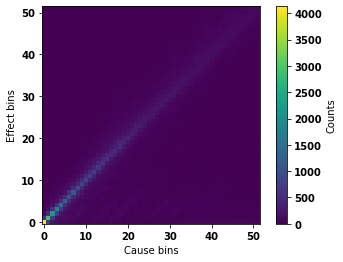

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(response_hist, origin='lower')
cbar = plt.colorbar(im, label='Counts')
ax.set(xlabel='Cause bins', ylabel='Effect bins')
plt.show()

In [14]:
efficiencies = np.ones_like(response_hist[0], dtype=float)
efficiencies = np.array([0.04909, 0.04524, 0.04183, 0.04051, 0.03752, 0.03591, 0.03503, 0.03522, 0.03502, 0.03473, 0.03462, 0.03323, 0.03454, 0.03392, 0.03748, 0.03296, 0.03404, 0.03563, 0.03571, 0.03423, 0.03214, 0.03157, 0.03037, 0.0299, 0.02863, 0.0284, 0.02772, 0.02829, 0.02715, 0.02814, 0.02754, 0.03149, 0.0261, 0.02621, 0.02637, 0.02566, 0.02748, 0.0296, 0.03041, 0.0304, 0.02933, 0.02696, 0.02621, 0.02643, 0.02639, 0.02705, 0.02752, 0.02765, 0.02703, 0.02639, 0.02651, 0.02619])
efficiencies

array([0.04909, 0.04524, 0.04183, 0.04051, 0.03752, 0.03591, 0.03503,
       0.03522, 0.03502, 0.03473, 0.03462, 0.03323, 0.03454, 0.03392,
       0.03748, 0.03296, 0.03404, 0.03563, 0.03571, 0.03423, 0.03214,
       0.03157, 0.03037, 0.0299 , 0.02863, 0.0284 , 0.02772, 0.02829,
       0.02715, 0.02814, 0.02754, 0.03149, 0.0261 , 0.02621, 0.02637,
       0.02566, 0.02748, 0.0296 , 0.03041, 0.0304 , 0.02933, 0.02696,
       0.02621, 0.02643, 0.02639, 0.02705, 0.02752, 0.02765, 0.02703,
       0.02639, 0.02651, 0.02619])

In [15]:
efficiencies_err = np.array([i*0.01 for i in efficiencies])
efficiencies_err = np.array([0.000717633807035315, 0.000687652947350624, 0.000660149595925045, 0.000649238477756825, 0.000623921071931378, 0.000609914158714159, 0.000602138695816836, 0.000603824878586499, 0.00060204983514656, 0.000599467871532745, 0.000598485959735063, 0.000585954203841904, 0.000597770956136211, 0.000592204072934322, 0.000623576381849088, 0.000583492601495512, 0.000593285105156029, 0.000607449560869049, 0.000608154619319791, 0.000594993217608403, 0.00057595989096464, 0.000570672102875198, 0.000559395538952538, 0.000554923508242352, 0.000542675565139983, 0.000540430939158742, 0.000533745242601749, 0.000539354466932462, 0.000528082592971971, 0.000537883440905184, 0.000531962889683106, 0.000569926487364818, 0.000517505652143047, 0.000518622831159601, 0.00052024395143048, 0.000513014966643274, 0.000531367578988406, 0.000552052171447591, 0.00055977466984493, 0.000559679908519146, 0.000549456539682621, 0.000526182873153431, 0.000518622831159601, 0.000520850697417216, 0.000520446271002108, 0.000527083508563871, 0.000531764519312825, 0.000533052741293017, 0.000526883487120255, 0.000520446271002108, 0.000521658701643134, 0.000518419869410886])
efficiencies_err

array([0.00071763, 0.00068765, 0.00066015, 0.00064924, 0.00062392,
       0.00060991, 0.00060214, 0.00060382, 0.00060205, 0.00059947,
       0.00059849, 0.00058595, 0.00059777, 0.0005922 , 0.00062358,
       0.00058349, 0.00059329, 0.00060745, 0.00060815, 0.00059499,
       0.00057596, 0.00057067, 0.0005594 , 0.00055492, 0.00054268,
       0.00054043, 0.00053375, 0.00053935, 0.00052808, 0.00053788,
       0.00053196, 0.00056993, 0.00051751, 0.00051862, 0.00052024,
       0.00051301, 0.00053137, 0.00055205, 0.00055977, 0.00055968,
       0.00054946, 0.00052618, 0.00051862, 0.00052085, 0.00052045,
       0.00052708, 0.00053176, 0.00053305, 0.00052688, 0.00052045,
       0.00052166, 0.00051842])

In [16]:
column_sums = response_hist.sum(axis=0) 
normalization_factor = efficiencies / column_sums

In [17]:
response = response_hist * normalization_factor
response_err = response_hist_err * normalization_factor

In [18]:
response.sum(axis=0)

array([0.04909, 0.04524, 0.04183, 0.04051, 0.03752, 0.03591, 0.03503,
       0.03522, 0.03502, 0.03473, 0.03462, 0.03323, 0.03454, 0.03392,
       0.03748, 0.03296, 0.03404, 0.03563, 0.03571, 0.03423, 0.03214,
       0.03157, 0.03037, 0.0299 , 0.02863, 0.0284 , 0.02772, 0.02829,
       0.02715, 0.02814, 0.02754, 0.03149, 0.0261 , 0.02621, 0.02637,
       0.02566, 0.02748, 0.0296 , 0.03041, 0.0304 , 0.02933, 0.02696,
       0.02621, 0.02643, 0.02639, 0.02705, 0.02752, 0.02765, 0.02703,
       0.02639, 0.02651, 0.02619])

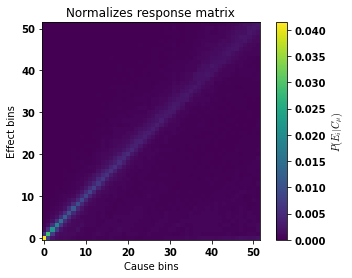

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(response, origin='lower')
cbar = plt.colorbar(im, label='$P(E_i|C_{\mu})$')
ax.set(xlabel='Cause bins', ylabel='Effect bins',
       title='Normalizes response matrix')
plt.show()

In [20]:
def unfold(inpfile = "build-LXe/data_Cf252.root",inphist = "h7"):
    f1 = ROOT.TFile.Open(inpfile)
    h7 = f1.Get(inphist)
    data_observed = []
    data_observed_err = []
    for i in range(h7.GetNbinsX()):
        data_observed.append(h7.GetBinContent(i+1))
        data_observed_err.append(h7.GetBinError(i+1))

    unfolded_results = iterative_unfold(data=data_observed,
                                        data_err=data_observed_err,
                                        response=response,
                                        response_err=response_err,
                                        efficiencies=efficiencies,
                                        efficiencies_err=efficiencies_err,
                                        callbacks=[Logger()])
    return data_observed,data_observed_err,unfolded_results

In [21]:
data_observed,data_observed_err,unfolded_results = unfold(inpfile = "build-LXe/data_Cf252.root",inphist = "h7")

Iteration 1: ts = 0.2142, ts_stopping = 0.01
Iteration 2: ts = 0.1541, ts_stopping = 0.01
Iteration 3: ts = 0.0765, ts_stopping = 0.01
Iteration 4: ts = 0.0349, ts_stopping = 0.01
Iteration 5: ts = 0.0169, ts_stopping = 0.01
Iteration 6: ts = 0.0089, ts_stopping = 0.01


In [22]:
unfolded_results['unfolded']

array([ 5856.64626899, 12487.94012525, 12932.79837537, 12967.97611514,
       12102.78178637, 12887.7006637 , 12503.93453506, 11063.11280129,
       10281.47908762,  9595.08350688,  8041.34422659,  7361.09679201,
        7298.47048414,  6616.9111518 ,  5673.43895102,  4735.6430342 ,
        3662.06385196,  3305.97618972,  2791.944642  ,  2436.86736436,
        2103.53040178,  1936.84391167,  1833.93709222,  1673.53512021,
        1746.02658926,  1671.49231362,  1329.99269625,  1198.0871751 ,
         982.33169247,   924.18448723,   709.7092784 ,   508.20173794,
         727.49113853,   649.2472775 ,   575.30565871,   492.2560793 ,
         476.62469685,   347.20700133,   316.55342763,   280.00216905,
         199.0980017 ,   268.96501243,   239.4340925 ,   187.3590211 ,
         164.99814996,   143.20557756,   157.38648875,   204.86847277,
         198.17050302,   225.09779228,   289.56925119,   373.85491742])

In [23]:
unfolded_results['sys_err']

array([ 676.04997666, 1248.02429514, 1380.60623011, 1364.59593471,
       1332.17541438, 1363.94153493, 1285.38629155, 1225.82840746,
       1089.55324214, 1040.58606934,  903.00019361,  865.60963791,
        796.14738191,  776.5951607 ,  659.23008   ,  613.4544885 ,
        489.2657904 ,  437.73871628,  405.25270368,  371.6606209 ,
        357.02250543,  344.53151405,  343.45464309,  331.92605306,
        353.64973617,  349.68545455,  310.23767467,  289.18762573,
        261.45160166,  248.56772982,  206.69857187,  144.34318857,
        232.16580831,  215.00775731,  200.71576412,  186.77523349,
        173.98869581,  127.58299451,  118.09234217,  109.5683507 ,
         86.36584624,  124.02668099,  118.11561766,   96.5643156 ,
         88.38214093,   76.88204757,   81.65022154,  101.77163124,
         99.50979246,  113.06114946,  138.33542207,  170.36992656])

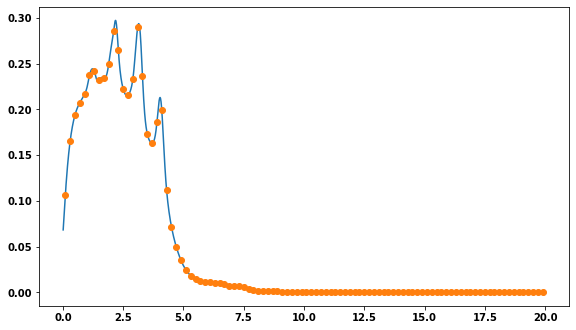

Info in <TH1F::SaveAs>: ROOT file LXe/hin134.root has been created


In [24]:
## In134 neutron spectra
fig,axis = plt.subplots()
fig.set_size_inches(9.5,5.5)
fig.subplots_adjust(hspace=0,wspace=0)

dat = np.genfromtxt("LXe/In134_theo1_hires.txt",dtype='str').transpose()
xx = [float(i) for i in dat[1]]
yy = [float(i) for i in dat[2]]
axis.plot(xx,yy)

x = np.arange(0.1,20,0.2)
y = np.interp(x,xx,yy)
axis.plot(x,y,"o")

hin134 = ROOT.TH1F("hin134","hin134",52,0,52*200+100)

in134lowres = '/gps/hist/point 0 0\n'
for idx,i in enumerate(x):
    in134lowres+="/gps/hist/point %g %g\n" % (i,y[idx])
    hin134.SetBinContent(idx+1,y[idx])
with open('results/In134_theo1_lowres.txt', 'w') as f:
    f.write(in134lowres)

hin134.SaveAs("LXe/hin134.root")

In [25]:
data_observed,data_observed_err,unfolded_results_in134 = unfold(inpfile = "build-LXe/data_in134.root",inphist = "h7")

# f1 = ROOT.TFile.Open("build-LXe/data_in134.root")
# h7 = f1.Get("h7")
# data_observed = []
# data_observed_err = []
# for i in range(h7.GetNbinsX()):
#     data_observed.append(h7.GetBinContent(i+1))
#     data_observed_err.append(h7.GetBinError(i+1))

# print(data_observed)
# print(data_observed_err)

Iteration 1: ts = 0.1983, ts_stopping = 0.01
Iteration 2: ts = 0.1351, ts_stopping = 0.01
Iteration 3: ts = 0.0728, ts_stopping = 0.01
Iteration 4: ts = 0.0377, ts_stopping = 0.01
Iteration 5: ts = 0.0208, ts_stopping = 0.01
Iteration 6: ts = 0.0125, ts_stopping = 0.01
Iteration 7: ts = 0.0081, ts_stopping = 0.01


In [26]:
def getSpec(ftmp,unfolded_results , observfile = "build-LXe/data_in134.root",geant4inp = "LXe/hin134.root",geantinpname = "hin134"):
    f1 = ROOT.TFile.Open(observfile)
    nbins = f1.h7.GetNbinsX()
    xmax = f1.h7.GetXaxis().GetXmax()
    maxBinContent = f1.h7.GetMaximum()
    ftmp.cd()
    h7c = f1.h7.Clone()
    print(nbins,xmax)

    f2 = ROOT.TFile.Open(geant4inp)
    hin134 = f2.Get(geantinpname)
    hresult = ROOT.TH1F("hresult","hresult",nbins,0,xmax)
    for i in range(len(unfolded_results['unfolded'])):
        hresult.SetBinContent(i+1,unfolded_results['unfolded'][i])
        hresult.SetBinError(i+1,unfolded_results['sys_err'][i])
    scale = maxBinContent/hresult.GetMaximum()
    hresult.Scale(scale)
    hresult.SetMarkerStyle(20)
    ftmp.cd()
    hresultc = hresult.Clone()
    # hresult.GetXaxis().SetRangeUser(0,2000)
    hin134.SetLineColor(2)
    scale = maxBinContent/hin134.GetMaximum()
    # print(hcf252.GetMaximum(),hresult.GetMaximum())
    hin134.Scale(scale)
    ftmp.cd()
    hin34c = hin134.Clone()
    f1.Close()
    f2.Close()
    h7c.SetLineColor(3)
    return h7c,hin34c,hresultc

52 10500.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


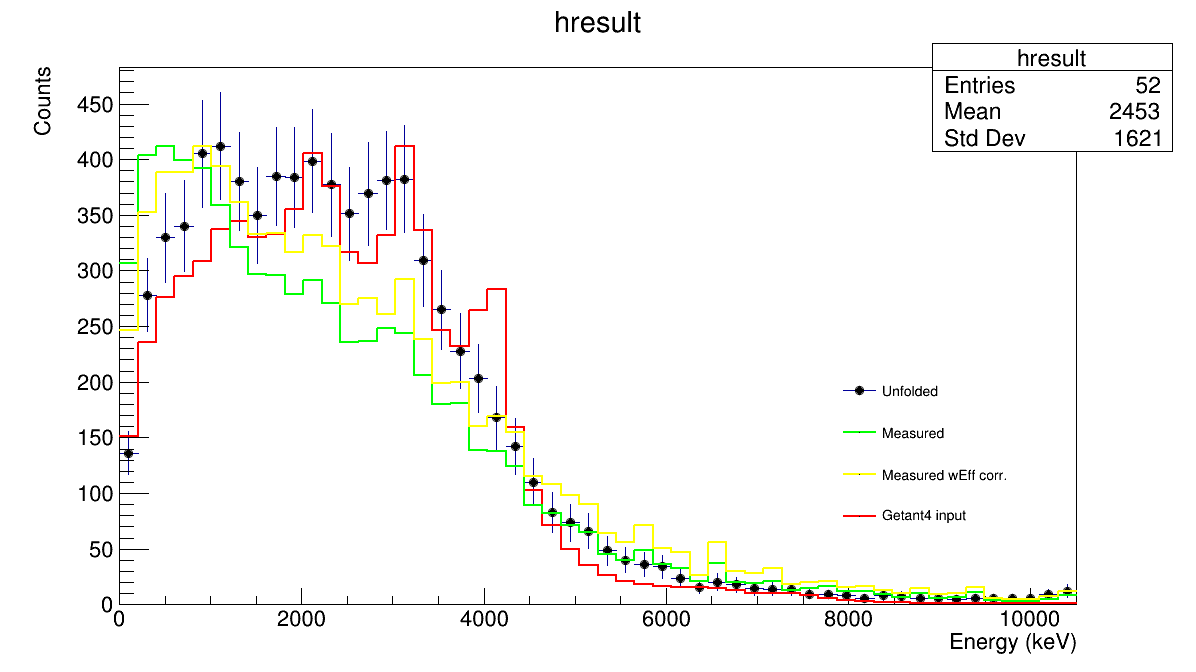

In [27]:
ftmp = ROOT.TFile.Open("results/tmp.root","recreate")
leg = ROOT.TLegend(0.7,0.6-0.4,0.85,0.85-0.4)
leg.SetLineColor(0)
c1 = ROOT.TCanvas("c1","c1",1200,700)
c1.cd()
h7c,hin134c,hresult = getSpec(ftmp,unfolded_results_in134)
hresult.Draw("E0")
hresult.GetXaxis().SetTitle("Energy (keV)")
hresult.GetYaxis().SetTitle("Counts")
hin134c.SetLineWidth(2)
hin134c.Draw("hist same")
h7c.SetLineWidth(2)
h7c.Draw("hist same")

h7cc = h7c.Clone()
h7cc.SetName("h7cc")
h7cc.SetLineColor(5)
for i in range(h7c.GetNbinsX()):
    h7cc.SetBinContent(i+1,h7c.GetBinContent(i+1)/efficiencies[i])
scale = h7c.GetMaximum()/h7cc.GetMaximum()
h7cc.Scale(scale)
h7cc.Draw("hist same")

leg.AddEntry(hresult,"Unfolded")
leg.AddEntry(h7c,"Measured")
leg.AddEntry(h7cc,"Measured wEff corr.")
leg.AddEntry(hin134c,"Getant4 input")
leg.Draw()
c1.Draw()

52 10500.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


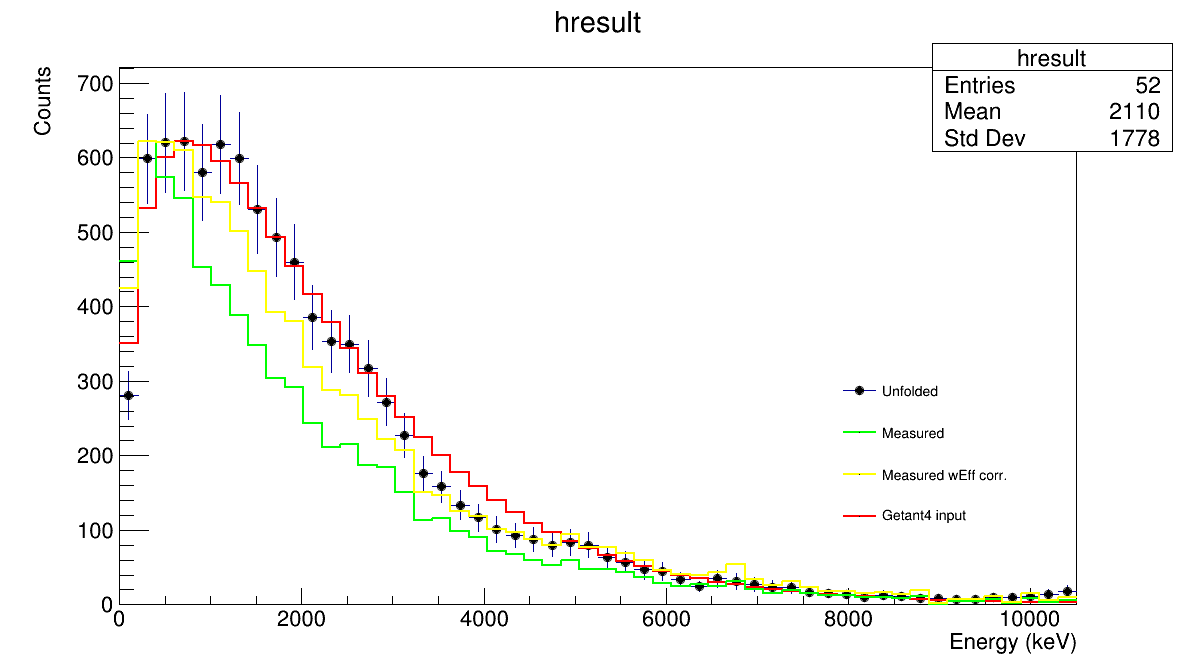

In [28]:
ftmp = ROOT.TFile.Open("results/tmp.root","recreate")
c1 = ROOT.TCanvas("c1","c1",1200,700)
leg = ROOT.TLegend(0.7,0.6-0.4,0.85,0.85-0.4)
leg.SetLineColor(0)
c1.cd()
h7c,hin134c,hresult = getSpec(ftmp,unfolded_results,"build-LXe/data_Cf252.root","LXe/hcf252.root","hcf252")
hresult.Draw("E0")
hresult.GetXaxis().SetTitle("Energy (keV)")
hresult.GetYaxis().SetTitle("Counts")
hin134c.SetLineWidth(2)
hin134c.Draw("hist same")
h7c.SetLineWidth(2)
h7c.Draw("hist same")

h7cc = h7c.Clone()
h7cc.SetName("h7cc")
h7cc.SetLineColor(5)
for i in range(h7c.GetNbinsX()):
    h7cc.SetBinContent(i+1,h7c.GetBinContent(i+1)/efficiencies[i])
scale = h7c.GetMaximum()/h7cc.GetMaximum()
h7cc.Scale(scale)
h7cc.Draw("hist same")

leg.AddEntry(hresult,"Unfolded")
leg.AddEntry(h7c,"Measured")
leg.AddEntry(h7cc,"Measured wEff corr.")
leg.AddEntry(hin134c,"Getant4 input")
leg.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


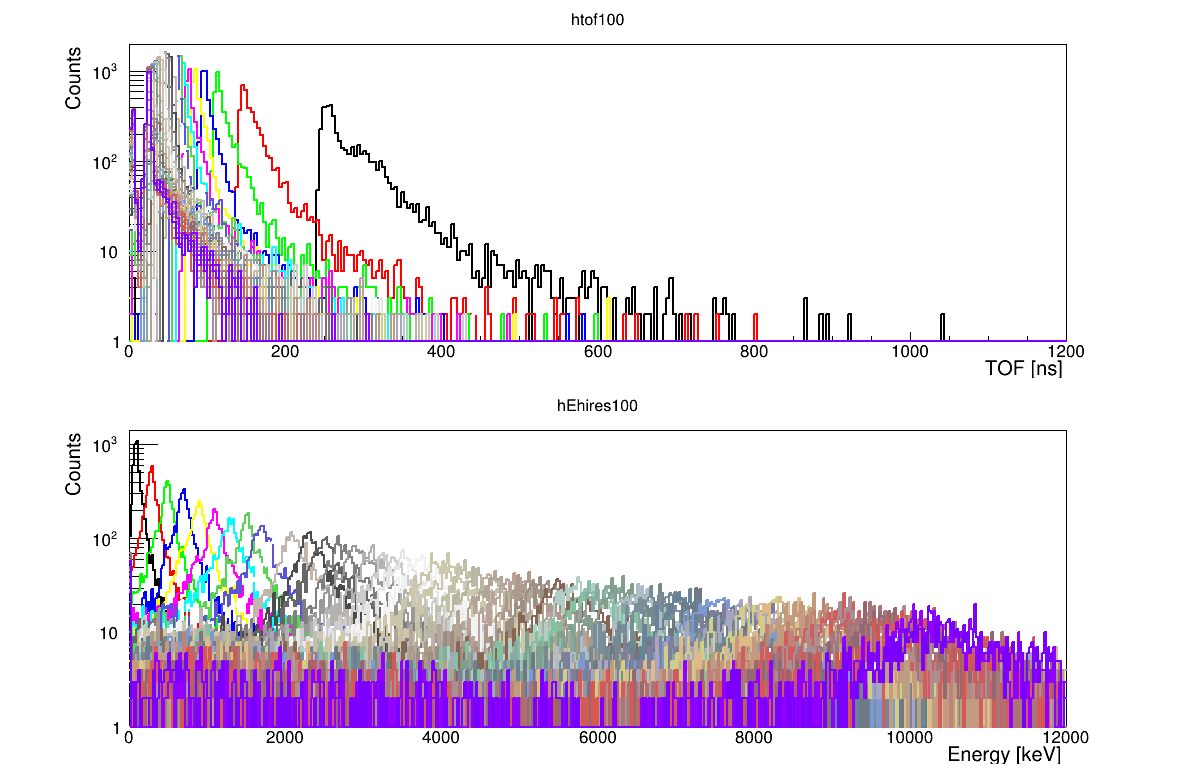

In [29]:
ROOT.gStyle.SetOptStat(0)
ftmp = ROOT.TFile.Open("build-LXe/response_matrix_230101.root")
c1 = ROOT.TCanvas("c1","c1",1200,800)
leg = ROOT.TLegend(0.7,0.3,0.85,0.85)
c1.Divide(1,2)
k = 0
for i in range(0,52):
    e = i*200+100
#     print("htof"+str(e))
    htof = ftmp.Get("htof"+str(e))
    he = ftmp.Get("hEhires"+str(e)) 
    htof.SetLineColor(i+1)
    he.SetLineColor(i+1)
    htof.SetLineWidth(2)
    leg.AddEntry(he,str(e)+" keV")
    he.SetLineWidth(2)
    c1.cd(1).SetLogy()
    if (k==0):
        htof.Draw()
        htof.GetXaxis().SetLabelSize(0.05)
        htof.GetYaxis().SetLabelSize(0.05)
        htof.GetXaxis().SetRangeUser(0,1200)
        htof.GetYaxis().SetRangeUser(1,2000)
        htof.GetXaxis().SetTitle("TOF [ns]")
        htof.GetYaxis().SetTitle("Counts")
        htof.GetXaxis().SetTitleSize(0.06)
        htof.GetXaxis().SetTitleOffset(0.8)
        htof.GetYaxis().SetTitleSize(0.06)
        htof.GetYaxis().SetTitleOffset(0.5)
    else:
        htof.Draw("same")
    c1.cd(2).SetLogy()
    if (k==0):
        he.Draw()
        he.GetXaxis().SetLabelSize(0.05)
        he.GetYaxis().SetLabelSize(0.05)
        he.GetXaxis().SetRangeUser(0,12000)
        he.GetYaxis().SetRangeUser(1.,1400)
        he.GetXaxis().SetTitle("Energy [keV]")
        he.GetYaxis().SetTitle("Counts")
        he.GetXaxis().SetTitleSize(0.06)
        he.GetXaxis().SetTitleOffset(0.8)
        he.GetYaxis().SetTitleSize(0.06)
        he.GetYaxis().SetTitleOffset(0.5)
    else:
        he.Draw("same")
    k+=1
    
c1.cd(2)
leg.SetLineColor(0)
# leg.Draw()
c1.Draw()
# c1.SaveAs("/home/phong/Downloads/results_Etof_100to1700keV_230417.root")
# c1.SaveAs("/home/phong/Downloads/results_Etof_all_230417.root")


### Detector efficiency

``` 
root -l
.L det_eff.C
det_respose()
```


In [30]:
f1 = ROOT.TFile.Open("build-LXe/eff_histogram.root")
x_ene = []
y_eff = []
for i in range(52):
    hname = "heff%d" % (200*i+100)
    h1 = f1.Get(hname)
    eff = h1.GetEntries()/100000
    hefferr = np.sqrt(1/h1.GetEntries()+1/100000)*100.
    print(200*i+100,eff,hefferr)
    x_ene.append(200*i+100)
    y_eff.append(eff*100)
    if ((200*i+100)==900):
        hname = "heff1000"
        h1 = f1.Get(hname)
        eff = h1.GetEntries()/1000000
        hefferr = np.sqrt(1/h1.GetEntries()+1/1000000)*100.
        print(1000,eff,hefferr)
        x_ene.append(1000)
        y_eff.append(eff*100)

100 0.00973 3.221411537180678
300 0.09649 1.066009768535991
500 0.09865 1.0553126285819772
700 0.10058 1.0460561390351495
900 0.09661 1.0654058077769235
1000 0.088247 0.351167053939048
1100 0.09326 1.082714676231244
1300 0.09083 1.0958822168987798
1500 0.09162 1.0915423700840543
1700 0.09037 1.0984361211008058
1900 0.08988 1.101178718709409
2100 0.08844 1.1093737359131801
2300 0.08529 1.1280382950602887
2500 0.08517 1.1287702793519139
2700 0.08289 1.1429865023388919
2900 0.08702 1.1176587638398212
3100 0.08005 1.161558968789904
3300 0.08088 1.1560275102055861
3500 0.08413 1.135181321983873
3700 0.08422 1.1346217084463026
3900 0.08258 1.144965921118672
4100 0.07741 1.1797553822369555
4300 0.07721 1.1811727306186222
4500 0.07436 1.2020020953046335
4700 0.07234 1.2175225142526902
4900 0.06969 1.2389213458915713
5100 0.06809 1.25245536494551
5300 0.0662 1.2690839287166504
5500 0.06674 1.2642593930858073
5700 0.06659 1.265593531128355
5900 0.06623 1.2688143197671606
6100 0.06602 1.270705519

Text(0, 0.5, 'Efficiency (%)')

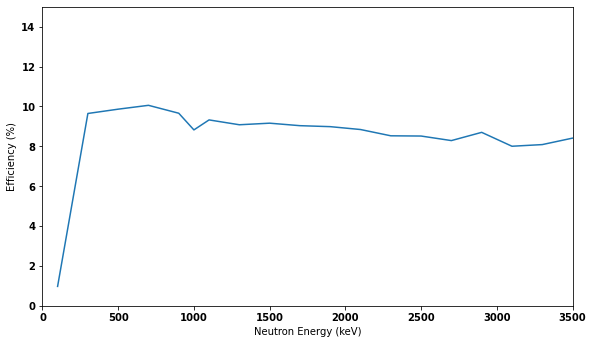

In [31]:
fig,axis = plt.subplots()
fig.set_size_inches(9.5,5.5)
fig.subplots_adjust(hspace=0,wspace=0)
axis.plot(x_ene,y_eff,"-")
axis.set_ylim([0,15])
axis.set_xlim([0,3500])
axis.set_xlabel('Neutron Energy (keV)')
axis.set_ylabel('Efficiency (%)')